<header style="padding:10px;background:#f9f9f9;border-top:3px solid #00b2b1"><img id="Teradata-logo" src="https://www.teradata.com/Teradata/Images/Rebrand/Teradata_logo-two_color.png" alt="Teradata" width="220" align="right" />

<h1 style="color:darkorange">Insurance Analysis Using Temporal </h1>
</header>

<h3 style="color:black">Applications require to design and build databases dependant on time or data changes over time.  Building such applications is possible but becomes easier with Temporal </h3>
<h4 style="color:black">Here we are considering the example of Insurance company storing data for various policies whose validity, conditions , premium amount and many other factors will change over Time period
    
Some scenarios that can be handled using temporal features are as below 
    
    1. Consider that there was some hail storm and then there are claims made against the insurance policies. The As of date feature can be used to check the validity of the policy and than the incident date can be used to check which claims fall in the validity period of the policies.
    
    2. Another scenario is that the customer has sold the vehicle and the closure of the policy happened a week late as the customer informed late about the sale , so based on the transaction time the validity of the policies will change.

</h4>
<p style = 'font-size:16px;font-family:Arial'><b>Links:</b></p>
<ul style = 'font-size:16px;font-family:Arial'>
    <li>Information about Temporal datatype can be found at: <a href = 'https://docs.teradata.com/r/Teradata-VantageTM-Temporal-Table-Support/July-2021'>https://docs.teradata.com/r/Teradata-VantageTM-Temporal-Table-Support/July-2021</a></li>
</ul>



<h3 style="color:darkorange">Let's start by connecting to the Teradata system

In [1]:
%connect local

Password: ········


Success: 'local' connection established and activated for user 'demo_user'


<h3 style="color:black">Create a table with Start and end date to load data without any temporal features 

In [82]:
CREATE MULTISET TABLE Policy_Details_Org(
Policy_ID INTEGER,
Customer_ID INTEGER,
Policy_State CHAR(2) NOT NULL,
Policy_premium_Amt INTEGER,
auto_make Varchar(20),
auto_model Varchar(30),
Policy_start_date Date,
Policy_end_date Date 
)
PRIMARY INDEX(Policy_ID);

Success: 0 rows affected

In [83]:
%dataload table=Policy_Details_Org, database=demo_user, FILEPATH=UseCases/InsurancePolicyClaims/Policy_Det_org.csv, skiprows=1

Using database: demo_user
2022-07-05T05:03:16.488 Start Batch Loading...
     
Data Load: Number Rows Loaded = 2,958, Elapsed Time = 00:00:02.526, History ID = 1065
Success Loading Data: from file,'/home/jovyan/JupyterLabRoot/UseCases/InsurancePolicyClaims/Policy_Det_org.csv', into table, demo_user.Policy_Details_Org.

<h3 style="color:black">Create a table with temporal ValidTime column having Period datatype storing validity of the policies

In [84]:
CREATE MULTISET TABLE Policy_Details(
Policy_ID INTEGER,
Customer_ID INTEGER,
Policy_State CHAR(2) NOT NULL,
Policy_premium_Amt INTEGER,
auto_make Varchar(20),
auto_model Varchar(30),
Policy_Validity PERIOD(DATE) NOT NULL AS VALIDTIME
)
PRIMARY INDEX(Policy_ID);

Success: 0 rows affected

<h3 style="color:black">Insert data from staging to create temporal ValidTime column having Period datatype 

In [85]:
Insert into Policy_Details
Select
Policy_ID ,
Customer_ID,
Policy_state ,
Policy_premium_Amt ,
auto_make ,
auto_model ,
PERIOD(policy_start_date, policy_end_date)
FROM Policy_Details_Org

Success: 2958 rows affected

<h3 style="color:black">Set session properties to use the Temporal functions

In [4]:
----SET SESSION CURRENT VALIDTIME;

Success: 1 rows affected

<h3 style="color:black">Use the Temporal ValidTime function to display all records loaded

In [86]:
sequenced validtime
select * from policy_Details;

,Policy_ID,Customer_ID,Policy_State,Policy_premium_Amt,auto_make,auto_model,VALIDTIME
1,919880,8779974,IN,1168,Ford,Fusion,"2002-12-29,2003-12-29"
2,872734,4158226,IN,1003,Accura,MDX,"1990-05-19,1991-05-19"
3,868288,1659810,IN,1136,Nissan,Maxima,"2006-08-06,2007-08-06"
4,613226,4439853,IN,1595,Jeep,Wrangler,"1991-08-22,1992-08-22"
5,910622,1417657,IN,1175,Dodge,Neon,"1992-03-22,1993-03-22"
6,602704,1948931,OH,1189,Jeep,Wrangler,"2011-09-27,2012-09-27"
7,208303,1976899,OH,823,Mercedes,E400,"1991-05-03,1992-05-03"
8,596790,4781149,IL,1154,Accura,TL,"2014-09-04,2015-09-04"
9,746630,8224111,IN,1054,Toyota,Corolla,"1997-02-10,1998-02-10"
10,933298,6425852,IL,1272,Suburu,Legacy,"1993-08-03,1994-08-03"


<h4 style="color:black">Comparing the Validity and VALIDTIME columns demonstrates that the valid-time period of the result set is the intersection of the valid-time period in the original Policy table Validity column with the PA specified
in the sequenced select statement.


In [87]:
SEQUENCED VALIDTIME PERIOD '(2009-01-01, 2009-12-31)'
SELECT Policy_ID, Customer_ID, Policy_Validity FROM (
SEQUENCED VALIDTIME SELECT Policy_details.*, Policy_Validity
FROM Policy_Details where policy_state = 'IN') AS my_derived_table;


,Policy_ID,Customer_ID,Policy_Validity,VALIDTIME
1,237423,1133354,"2008-06-04,2009-06-04","2009-01-01,2009-06-04"
2,550132,3964730,"2008-01-04,2009-01-04","2009-01-01,2009-01-04"
3,332897,2540822,"2008-04-25,2009-04-25","2009-01-01,2009-04-25"
4,535879,8040359,"2009-03-05,2010-03-05","2009-03-05,2009-12-31"
5,853360,7409287,"2009-06-26,2010-06-26","2009-06-26,2009-12-31"
6,582973,8045031,"2008-06-11,2009-06-11","2009-01-01,2009-06-11"
7,615121,7625391,"2009-05-09,2010-05-09","2009-05-09,2009-12-31"
8,866936,4627650,"2008-07-07,2009-07-07","2009-01-01,2009-07-07"
9,250833,7877784,"2008-07-28,2009-07-28","2009-01-01,2009-07-28"
10,913464,6446834,"2009-01-21,2010-01-21","2009-01-21,2009-12-31"


<h4 style="color:black">Aggregations can be used for analysis of the data based on the validity period 
Comparisons of data between different validity periods can be compared. Like the minimum and maximum premium amounts for a particular state based on the model of the cars.



In [92]:
SEQUENCED VALIDTIME Period (date '2011-01-01', date '2020-12-31')
SELECT auto_make,
min(Policy_premium_Amt) as MinPremium,
max(Policy_premium_Amt) as MaxPremium
FROM Policy_Details
where policy_state = 'OH'
GROUP BY 1
ORDER BY VALIDTIME;



,auto_make,MinPremium,MaxPremium,VALIDTIME
1,Honda,1203,1453,"2011-01-01,2011-01-06"
2,Suburu,1038,1088,"2011-01-01,2011-01-12"
3,Mercedes,667,1783,"2011-01-01,2011-01-24"
4,Audi,1050,1714,"2011-01-01,2011-01-28"
5,Accura,1489,1489,"2011-01-01,2011-02-02"
6,BMW,1052,1307,"2011-01-01,2011-02-03"
7,Jeep,830,880,"2011-01-01,2011-02-11"
8,Toyota,1338,1338,"2011-01-01,2011-02-21"
9,Saab,1484,1539,"2011-01-01,2011-03-11"
10,Dodge,998,1305,"2011-01-01,2011-03-17"


<h4 style="color:black">Time line for various Policies :-    Analysis can be done for </h4>
    
<h5 style="color:black"> 
    
1.	Policies valid during a particular period. 
    
2.	Validity period of various policies 
    
3.	Premium amount collected during a particular period </h5>



<h3 style="color:black">Using the As Of concept to verify the active policies on a particular date

<h5 style="color:black">On a given date, there was a hail storm and we want to determine the count of policies in effect on that date
The scenario mentioned here can be solved by the below query using the As of Date feature of Temporal tables   
 </h5>


<img src="TemporalTimePeriod.png" style="width:600px;height:400px;">



In [25]:
VALIDTIME AS OF Date'2022-02-15'
SELECT Policy_ID, Customer_ID, Policy_premium_Amt,Policy_Validity FROM Policy_Details where policy_state = 'IL'

,Policy_ID,Customer_ID,Policy_premium_Amt,Policy_Validity
1,369786,2645288,1316,"2017-11-25,2022-11-25"
2,241562,7017277,2197,"2021-01-28,9999-12-31"
3,722747,5900891,1582,"2017-09-02,2022-09-02"
4,596790,4781149,1254,"2020-09-04,2025-09-04"
5,533940,4585664,1456,"2017-11-18,2022-11-18"
6,976650,5128749,1247,"2021-08-28,9999-12-31"
7,369048,8120451,1627,"2017-06-05,2022-06-05"
8,596790,4781149,1204,"2015-09-04,9999-12-31"
9,490601,6986977,1348,"2017-08-04,2022-08-04"
10,787351,5940419,1830,"2019-04-28,2024-04-28"


In [10]:
Select count(*) as "no of Policies" from (VALIDTIME AS OF Date'2022-02-15'
SELECT Policy_ID, Customer_ID, Policy_premium_Amt,Policy_Validity FROM Policy_Details where policy_state = 'IL') as DerivTbl

,no of Policies
1,367


<h5 style="color:black">Consider scenario where we need to check that for a particular period(here for year 2021) how many policies are valid for each auto make type and then compare the no of policies which are valid in the current period. This helps us in the comparision in the increase or decrease of policies for the current year as compared to the past year of validity
 </h5>


In [93]:
Select auto_make,count(*) as "no of Policies" from (VALIDTIME Period (date'2021-01-01',date'2021-12-31')
SELECT Policy_ID, Customer_ID, Policy_premium_Amt,auto_make FROM Policy_Details ) as DerivTbl group by 1

,auto_make,no of Policies
1,Chevrolet,23
2,Honda,13
3,Mercedes,10
4,Ford,28
5,Suburu,21
6,Volkswagen,28
7,Dodge,27
8,Accura,30
9,Saab,50
10,Audi,46


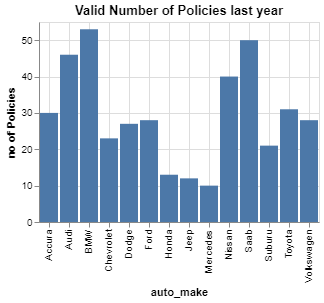

In [94]:
%chart x=auto_make, y="no of Policies", title= Valid Number of Policies last year 

<h5 style="color:black">Now we check how many policies are still valid for each type using the current functionality
 </h5>


In [95]:
Select auto_make,count(*) as "no of Policies" from (current VALIDTIME 
SELECT Policy_ID, Customer_ID, Policy_premium_Amt,auto_make FROM Policy_Details ) as DerivTbl group by 1

,auto_make,no of Policies
1,Chevrolet,23
2,Honda,12
3,Mercedes,8
4,Ford,22
5,Suburu,20
6,Volkswagen,27
7,Dodge,25
8,Accura,26
9,Saab,47
10,Audi,41


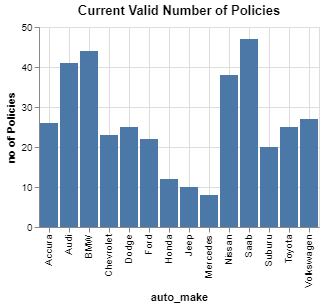

In [96]:
%chart x=auto_make, y="no of Policies", title= Current Valid Number of Policies  

<h5 style="color:black">Consider scenario where there are a number of claims raised against policies on various incident dates. Below queries help to identify which claims are made in the validity period and which are not and which policies are valid at the time of the incidents.There are total 69 claims in the Insurance Claims tables and based on the incident date we can verify which claims are valid and which are not valid.
 </h5>


In [97]:
Create table Insurance_Claims_Details 
(Policy_id INTEGER,
Claim_id INTEGER,
Incident_date date,
claim_date date, 
Claim_amount INTEGER
)
PRIMARY INDEX (Policy_id);


Success: 0 rows affected

In [98]:
Insert into Insurance_Claims_Details (Policy_id,Claim_id,Incident_date,claim_date,Claim_amount)
Select Top 200 
Policy_ID ,
Random(10000, 90000) , 
BEGIN(Policy_Validity) + Random(-5, 20), 
END(Policy_Validity) + Random(-40, 3),
Random(250,3000) 
from Policy_Details where BEGIN(Policy_Validity) >= '2010-01-01' and END(policy_Validity) between '2021-01-01' and '2022-12-31'



Success: 69 rows affected

In [99]:
SELECT * from Insurance_Claims_Details;


,Policy_id,Claim_id,Incident_date,claim_date,Claim_amount
1,369786,45351,2017-12-11,2022-11-12,2248
2,241562,26351,2016-01-30,2021-01-05,595
3,722747,84922,2017-09-16,2022-08-22,1994
4,515222,62581,2016-12-29,2021-11-28,2330
5,533940,89478,2017-11-16,2022-11-03,2604
6,976650,87026,2016-09-17,2021-08-16,2699
7,369048,62203,2017-06-20,2022-05-08,1719
8,212585,48244,2016-01-16,2020-12-07,2872
9,490601,52579,2017-08-04,2022-07-11,2070
10,235869,80960,2017-02-08,2022-01-15,1876


<h5 style="color:black">Based on the Claims made , we need to validate which claims are valid based on the incident date mentioned. Below query helps in the analysis. Only the rows that qualify for the claims are displayed.
 </h5>


In [100]:
SELECT Policy.customer_id,Policy.Policy_id, Insurance_Claims_Details.Claim_Id, Claim_amount
FROM (current VALIDTIME SELECT Policy_Details.*, Policy_Validity FROM Policy_Details )Policy
INNER JOIN Insurance_Claims_Details ON Policy.Policy_id = Insurance_Claims_Details.Policy_id
WHERE Policy.Policy_Validity CONTAINS Insurance_Claims_Details.Incident_date;


,Customer_ID,Policy_ID,Claim_id,Claim_amount
1,2645288,369786,45351,2248
2,5759783,636550,35250,2443
3,5900891,722747,84922,1994
4,8369854,212585,48244,2872
5,6986977,490601,52579,2070
6,6548681,806086,62731,1550
7,7273220,998870,80381,2508
8,8369854,212585,13150,2326
9,3048175,651866,28328,1197
10,3309391,420948,22083,1231


<h3 style="color:black">Explaining the Temporal Concepts of Inserts /Deletes 

<h5 style="color:black">Customer 1 has policy 1 with Validity Period . In between the validity period the customer decides to change some factors which causes the premium increases , so there will be a new row which will insert a new row having validity period from changed date to the end of period.
    
    
    
Customer 2 has Policy 1 with validity period. In between the customer decides to increase the premium which also increases the validity period 
 </h5>


<img src="Temporal_Inserts_Updates.png" style="width:600px;height:400px;">



<h3 style="color:black">Inserting data into temporal table is simple for current validtime

In [15]:
current validtime Insert Policy_Details values (203914, 2316038,'OH'  ,1200,'Audi','A3')

Success: 1 rows affected

<h3 style="color:black">Inserting history rows will need Temporal Qualifier 

In [17]:
sequenced validtime Insert Policy_Details values (203914, 2316038,'OH'  ,1050,'Audi','A3' ,PERIOD(date'2002-06-10', date'2012-06-09'));
sequenced validtime Insert Policy_Details values (203914, 2316038,'OH'  ,1150,'Audi','A3' ,PERIOD(date'2012-06-10', date'2022-06-27'));


Success: 1 rows affected

Success: 1 rows affected

In [19]:
sequenced validtime select * from Policy_Details where customer_id = 2316038 order by validtime;

,Policy_ID,Customer_ID,Policy_State,Policy_premium_Amt,auto_make,auto_model,VALIDTIME
1,203914,2316038,OH,1000,Audi,A3,"2001-06-09,2002-06-09"
2,203914,2316038,OH,1050,Audi,A3,"2002-06-10,2012-06-09"
3,203914,2316038,OH,1050,Audi,A3,"2002-06-10,2012-06-09"
4,203914,2316038,OH,1150,Audi,A3,"2012-06-10,2022-06-27"
5,203914,2316038,OH,1150,Audi,A3,"2012-06-10,2022-06-27"
6,203914,2316038,OH,1200,Audi,A3,"2022-06-28,9999-12-31"
7,203914,2316038,OH,1200,Audi,A3,"2022-07-04,9999-12-31"


<h3 style="color:black">Without Temporal Qualifier the select will display only current row  

In [22]:
select * from Policy_Details where customer_id = 2316038 order by Policy_validity; 

,Policy_ID,Customer_ID,Policy_State,Policy_premium_Amt,auto_make,auto_model,Policy_Validity
1,203914,2316038,OH,1000,Audi,A3,"2001-06-09,2002-06-09"
2,203914,2316038,OH,1050,Audi,A3,"2002-06-10,2012-06-09"
3,203914,2316038,OH,1050,Audi,A3,"2002-06-10,2012-06-09"
4,203914,2316038,OH,1150,Audi,A3,"2012-06-10,2022-06-27"
5,203914,2316038,OH,1150,Audi,A3,"2012-06-10,2022-06-27"
6,203914,2316038,OH,1200,Audi,A3,"2022-06-28,9999-12-31"
7,203914,2316038,OH,1200,Audi,A3,"2022-07-04,9999-12-31"


<h4 style="color:black">When period is specified , Delete will only delete rows for that specific period (highlighted row in the above dataset) and the validity period for rows will change to the end of period specified in the delete 

<h4 style="color:black">Display rows for Specific Valid Period 

In [101]:
SEQUENCED VALIDTIME PERIOD '(1990-01-01, 1990-03-31)' SELECT * 
FROM Policy_details where policy_state = 'IN' order by validtime;


,Policy_ID,Customer_ID,Policy_State,Policy_premium_Amt,auto_make,auto_model,VALIDTIME
1,529112,1965883,IN,1240,Honda,Civic,"1990-01-30,1990-03-31"
2,171183,3976603,IN,671,Ford,Escape,"1990-02-01,1990-03-31"
3,598554,7535602,IN,795,Nissan,Maxima,"1990-02-14,1990-03-31"
4,728025,4414390,IN,1935,Mercedes,E400,"1990-02-15,1990-03-31"


<h4 style="color:black">Delete rows for Specific Valid Period will change the validity period to the end date specified in delete

In [21]:
SEQUENCED VALIDTIME PERIOD '(1990-01-01, 1990-01-30)' DELETE
FROM Policy_details where policy_state = 'IN';


Success: 1 rows affected

In [22]:
SEQUENCED VALIDTIME PERIOD '(1990-01-01, 1990-03-31)' SELECT * 
FROM Policy_details where policy_state = 'IN' order by validtime;

,Policy_ID,Customer_ID,Policy_State,Policy_premium_Amt,auto_make,auto_model,VALIDTIME
1,529112,1965883,IN,1240,Honda,Civic,"1990-01-30,1990-03-31"
2,171183,3976603,IN,671,Ford,Escape,"1990-02-01,1990-03-31"
3,598554,7535602,IN,795,Nissan,Maxima,"1990-02-14,1990-03-31"
4,728025,4414390,IN,1935,Mercedes,E400,"1990-02-15,1990-03-31"


<h4 style="color:black">Create Bi Temporal Table with ValidTime and TransactionTime Columns

In [104]:
CREATE MULTISET TABLE Policy_Bitemp (
Policy_ID INTEGER,
Customer_ID INTEGER,
Policy_State CHAR(2) NOT NULL,
Policy_premium_Amt INTEGER,
auto_make Varchar(20),
auto_model Varchar(30),
Policy_Validity PERIOD(DATE) NOT NULL AS VALIDTIME,
Policy_Duration PERIOD(TIMESTAMP(6) WITH TIME ZONE) NOT NULL
AS TRANSACTIONTIME
)
PRIMARY INDEX (Policy_ID)
PARTITION BY CASE_N(
(END(Policy_Validity) IS NULL OR
END(Policy_Validity) >= CURRENT_DATE AT
INTERVAL -'12:59' HOUR TO MINUTE) AND
END(Policy_Duration) >= CURRENT_TIMESTAMP,
END(Policy_Validity) < CURRENT_DATE AT
INTERVAL -'12:59' HOUR TO MINUTE AND
END(Policy_Duration) >= CURRENT_TIMESTAMP,
END(Policy_Duration) < CURRENT_TIMESTAMP);


Success: 0 rows affected

<h4 style="color:black">To insert back dated data , the tables needs to be made Non temporal and then Insert 

In [105]:
GRANT NONTEMPORAL ON Policy_Bitemp TO demo_user;

Success: 1 rows affected

In [106]:
Nontemporal
Insert into Policy_Bitemp
Select
Policy_Id ,
Customer_id,
Policy_state ,
Policy_premium_Amt ,
auto_make ,
auto_model ,
PERIOD(Policy_start_date, Policy_end_date),
PERIOD(cast(Policy_start_date as timestamp with time zone)
, 
cast(Policy_end_date as timestamp with time zone)
)    
FROM Policy_Details_org
where policy_state = 'OH'
and Policy_end_date < current_date
;

Success: 706 rows affected

<h4 style="color:black">Select data for a particular range of data temporal features need to be added to the select

In [107]:
sequenced validtime and transactiontime as of timestamp'2001-01-01 00:00:00'
sel * from Policy_Bitemp


,Policy_ID,Customer_ID,Policy_State,Policy_premium_Amt,auto_make,auto_model,VALIDTIME
1,117862,4468696,OH,979,Honda,Accord,"2000-07-14,2001-07-14"
2,182450,4877198,OH,1422,Nissan,Maxima,"2000-06-23,2001-06-23"
3,498847,6063829,OH,1255,Accura,RSX,"2000-11-04,2001-11-04"
4,898519,6230436,OH,954,Nissan,Pathfinder,"2000-05-21,2001-05-21"
5,732169,7532801,OH,1863,Mercedes,C300,"2000-11-05,2001-11-05"
6,943430,1543596,OH,1271,Honda,Accord,"2000-04-28,2001-04-28"
7,515050,2480517,OH,990,Accura,TL,"2000-11-16,2001-11-16"
8,810194,7844609,OH,1125,Dodge,Neon,"2000-02-29,2001-02-28"
9,594727,1579317,OH,1152,Toyota,Highlander,"2000-01-31,2001-01-31"
10,498842,3239170,OH,1205,Accura,RSX,"2000-05-04,2001-05-04"


In [108]:
NONTEMPORAL
UPDATE Policy_Bitemp
SET Policy_premium_Amt = Policy_premium_Amt + 10
,Policy_Duration =  PERIOD(TEMPORAL_TIMESTAMP,UNTIL_CLOSED)
WHERE policy_id in (686821
,898524
,118236
,117862
,732169)


Success: 5 rows affected

In [109]:
sequenced validtime and current transactiontime
sel * from Policy_Bitemp

,Policy_ID,Customer_ID,Policy_State,Policy_premium_Amt,auto_make,auto_model,VALIDTIME
1,117862,4468696,OH,989,Honda,Accord,"2000-07-14,2001-07-14"
2,118236,7454643,OH,1658,Accura,MDX,"2000-08-15,2001-08-15"
3,732169,7532801,OH,1873,Mercedes,C300,"2000-11-05,2001-11-05"
4,898524,1964820,OH,1014,Nissan,Pathfinder,"2000-11-21,2001-11-21"
5,686821,1818351,OH,1386,Saab,93,"2000-06-07,2001-06-07"


<h4 style="color:black">Consider the scenario when the validity changes a week later than the actual date which causes changes in the current validity

In [114]:
NONTEMPORAL
UPDATE Policy_Bitemp
SET policy_validity = PERIOD(Begin(policy_validity),date'2022-06-30') 
,Policy_Duration =  PERIOD(TEMPORAL_TIMESTAMP - interval '7' Day,Temporal_Timestamp)
WHERE policy_id in (686821
)


Success: 1 rows affected

In [115]:
sequenced validtime and current transactiontime
sel * from Policy_Bitemp

,Policy_ID,Customer_ID,Policy_State,Policy_premium_Amt,auto_make,auto_model,VALIDTIME
1,117862,4468696,OH,989,Honda,Accord,"2000-07-14,2001-07-14"
2,118236,7454643,OH,1658,Accura,MDX,"2000-08-15,2001-08-15"
3,732169,7532801,OH,1873,Mercedes,C300,"2000-11-05,2001-11-05"
4,898524,1964820,OH,1014,Nissan,Pathfinder,"2000-11-21,2001-11-21"


In [116]:
drop table Policy_bitemp;

Success: 26 rows affected

In [117]:
drop table Policy_Details;

Success: 22 rows affected

In [118]:
drop table Insurance_Claims_Details;

Success: 19 rows affected

In [119]:
drop table Policy_Details_org

Success: 22 rows affected